In [13]:
import shapefile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import twd97
import random

In [4]:
#sf = shapefile.Reader("./Data/三灣_Merge")
#sf = shapefile.Reader("./Data/三灣鄉/103年三灣鄉防治")
#sf = shapefile.Reader("./Data/三灣鄉/104年三灣鄉新增火蟻發生地圖號")
sf = shapefile.Reader("./Data/頭份鎮/103年與之前的頭份鎮防治")


In [5]:
df = pd.read_csv('./Data/test.csv')

In [6]:
df['LAT'] = df[df.columns[1]]
df['LON'] = df[df.columns[2]]
df['lat'] = df[df.columns[1]]
df['lon'] = df[df.columns[2]]

In [8]:
df.head()

,Tube ID,LAT (Y),LON (X),Date,IS RIFA,LAT,LON,lat,lon
0,24901723,2777271.63,290155.40,2011-08-18,1,2777271.63,290155.40,2777271.63,290155.40
1,24900702,2779891.62,288359.56,2011-11-02,1,2779891.62,288359.56,2779891.62,288359.56
2,24901402,2780855.44,289574.96,2011-10-28,1,2780855.44,289574.96,2780855.44,289574.96
3,24901402A,2780821.30,289552.24,2011-10-28,1,2780821.30,289552.24,2780821.30,289552.24
4,24901402B,2780824.40,289551.25,2011-10-28,1,2780824.40,289551.25,2780824.40,289551.25


In [7]:
twd97.towgs84(290155.40,2777271.63 )

(25.103237710994744, 121.39814582796106)

In [9]:
lats = np.ones(len(df))
lons = np.ones(len(df))

In [10]:
for i in df.index:
    (lats[i], lons[i]) = twd97.towgs84(df.loc[i].LON, df.loc[i].LAT)

In [11]:
df.lat = lats
df.lon = lons

In [12]:
df.head()

,Tube ID,LAT (Y),LON (X),Date,IS RIFA,LAT,LON,lat,lon
0,24901723,2777271.63,290155.40,2011-08-18,1,2777271.63,290155.40,25.103238,121.398146
1,24900702,2779891.62,288359.56,2011-11-02,1,2779891.62,288359.56,25.126938,121.380413
2,24901402,2780855.44,289574.96,2011-10-28,1,2780855.44,289574.96,25.135608,121.392494
3,24901402A,2780821.30,289552.24,2011-10-28,1,2780821.30,289552.24,25.135300,121.392268
4,24901402B,2780824.40,289551.25,2011-10-28,1,2780824.40,289551.25,25.135328,121.392258


In [79]:
n = 2

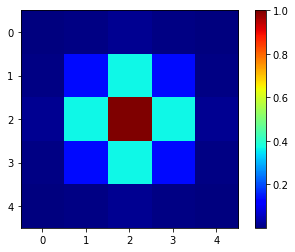

In [80]:
import numpy as np
import matplotlib.pyplot as plt

#3*3 Gassian filter
x, y = np.mgrid[-n:n+1, -n:n+1]
gaussian_kernel = np.exp(-(x**2+y**2))

#Normalization
#gaussian_kernel = gaussian_kernel / gaussian_kernel.sum()

plt.imshow(gaussian_kernel, cmap=plt.get_cmap('jet'), interpolation='nearest')
plt.colorbar()
plt.show()

In [81]:
fgaussian = gaussian_kernel.ravel()

In [16]:
from math import radians, cos, sin, asin, sqrt
 
def haversine(lon1, lat1, lon2, lat2): # 经度1，纬度1，经度2，纬度2 （十进制度数）
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # 将十进制度数转化为弧度
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
 
    # haversine公式
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # 地球平均半径，单位为公里
    return c * r * 1000



In [21]:
haversine(df.lat[0], df.lon[0],df.lat[0]+0.001, df.lon[0] )

57.930556324874814

In [71]:
def makeMatrix(lat, lon, steps, dist=0.001, flatten=False):
    lats = np.ones(((2*steps+1), (2*steps+1)))*lat
    lons = np.ones(((2*steps+1), (2*steps+1)))*lon
    #lats[n, n] = lat
    #lons[n, n] = lon
    
    for i in range(steps+1):
        for j in range(2*steps+1):
        
            lats[steps-i, j] = lat - dist * i
            lats[steps+i, j] = lat + dist * i
            lons[j, steps-i] = lon - dist * i
            lons[j, steps+i] = lon + dist * i
    if flatten:
        return lats.ravel(), lons.ravel()
    else:
        return lats, lons

In [96]:
lats, lons = makeMatrix(df.lat[0], df.lon[0], 2)

In [100]:
lats.ravel().shape

(25,)

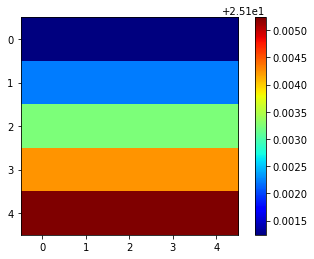

In [97]:
plt.imshow(lats, cmap=plt.get_cmap('jet'), interpolation='nearest')
#plt.imshow(lons, cmap=plt.get_cmap('jet'), interpolation='nearest')
plt.colorbar()
plt.show()

In [104]:
total_n = (2*n+1)**2
lats = np.ones(len(df)*total_n)
lons = np.ones(len(df)*total_n)
values = np.ones(len(df)*total_n)

In [107]:
for i in range(len(df)):
    lat = df.loc[i].lat
    lon = df.loc[i].lon
    latm, lonm = makeMatrix(lat, lon, n, dist=0.001, flatten=True)
    lats[i*total_n:(i+1)*total_n] = latm
    lons[i*total_n:(i+1)*total_n] = lonm
    values[i*total_n:(i+1)*total_n] = fgaussian

In [111]:
import os
os.environ['PROJ_LIB'] = '/home/tsai/anaconda3/envs/RIFA/share/proj'
from mpl_toolkits.basemap import Basemap

/home/tsai/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
/home/tsai/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


NameError: name 'meshgrid' is not defined

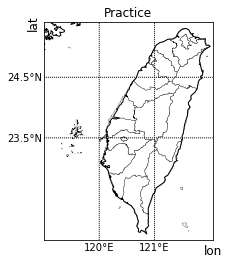

In [112]:
bmap = Basemap(projection='merc', 
                              resolution='i' , fix_aspect=True,
                              llcrnrlon=119.0 , llcrnrlat=21.8,
                              urcrnrlon=122.05 , urcrnrlat=25.4,
                              lat_ts =20)
bmap.readshapefile('./Data/COUNTY_MOI_1081121', name='COUNTYID' , linewidth=0.25 , drawbounds=True)
#海岸線的寬度
bmap.drawcoastlines(linewidth=1)

#儲存map , dpi=100表示存成800*600
#plt.savefig('practice_map' , dpi=100)

#畫緯度線23.5和25,labels標示出座標度數,fontsize文字大小
bmap.drawparallels(np.arange(23.5 , 25) , labels=[1,0,0,0] , fontsize=10)

#畫經度線120和122,labels標示出座標度數,fontsize文字大小
bmap.drawmeridians(np.arange(120,122),labels=[0,0,0,1],fontsize=10)

#map 底色backgroubd-color
#bmap.drawmapboundary(fill_color='#85C1E9')
#bmap.drawlsmask(land_color='coral',ocean_color='#85C1E9',lakes=True)
#取一個title
plt.title('Practice')

#設定XY說明label , xy範圍0~1(預設是中間0.5)
plt.xlabel('lon' , fontsize=12 , x=1)
plt.ylabel('lat' , fontsize=12 , y=1)
#plt.figure(figsize=(10, 20))

lon, lat = bmap(list(lats), list(lons))    # lon, lat為給定的經緯度，可以使單個的，也可以是列表
#bmap.plot(lon, lat, 'bo')         # 標註出所在的點，s為點的大小，還可以選擇點的性狀和顏色等屬性
lonn, latt = meshgrid(lon, lat)
bmap.contourf(lonn, latt, values)


plt.show()

#讀取shapefile



In [ ]:
name_info = bmap.readshapefile('./Data/TOWN_MOI_1090324', 'name')
for info, shape in zip(bmap.name_info, bmap.name):
    print(info)

In [102]:
list(df.LON*1e-4)

[29.015540000000005,
 28.835956,
 28.957496000000003,
 28.955224,
 28.955125000000002,
 28.94177,
 28.941397,
 29.366081,
 29.356568,
 29.369239000000004,
 29.334649,
 29.345840000000003,
 29.370416,
 29.367047,
 29.377207000000002,
 29.398693,
 29.373603000000003,
 29.387601000000004,
 29.46081,
 29.476526000000003,
 29.494140000000005,
 29.497478000000005,
 29.499489000000004,
 29.507471000000002,
 29.514503000000005,
 29.406696000000004,
 29.416248,
 29.43183,
 29.454757,
 29.471727000000005,
 29.499622,
 29.513346000000002,
 29.521624,
 29.527625,
 29.533744000000002,
 29.537188,
 29.538627,
 29.539227000000004,
 29.551362,
 29.531634000000004,
 29.556581,
 29.559155,
 29.535097,
 29.552495000000004,
 29.560476,
 29.530838000000003,
 29.544306000000002,
 29.561101,
 29.528444,
 29.554185,
 29.56473,
 29.529646999999997,
 29.558358000000002,
 29.574648,
 29.538134000000003,
 29.541868,
 29.578938,
 29.587106000000002,
 29.560304,
 29.576114000000004,
 29.593768,
 29.598989000000003,